In [211]:
import sys
sys.path.append('/home/nadzya/Apps/log-anomaly-detector/')

In [212]:
import pandas as pd
import numpy as np 

from anomaly_detector.storage.mongodb_storage import MongoDBDataStorageSource
from anomaly_detector.config import Configuration
from anomaly_detector.storage.storage_attribute import MGStorageAttribute
from anomaly_detector.model.w2v_model import W2VModel

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re
import string

In [213]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [214]:
def config():
    """Initialize configurations before testing."""
    cfg = Configuration()
    cfg.MG_HOST = "172.17.18.83"
    cfg.MG_PORT = 27017
    cfg.MG_CERT_DIR = ""
    cfg.MG_INPUT_DB = "anomalydb"
    cfg.MG_INPUT_COL = "utm_anomaly"
    cfg.HOSTNAME_INDEX = "hostname"
    cfg.DATETIME_INDEX = "timestamp"
    cfg.MG_USER = ''
    cfg.MG_PASSWORD = ''
    cfg.TRAIN_VECTOR_LENGTH = 25
    cfg.TRAIN_WINDOW = 5
    return cfg

In [215]:
cfg = config()
mg_attr = MGStorageAttribute(2592000, 1000)

In [216]:
mg = MongoDBDataStorageSource(cfg)

In [217]:
df_logs = mg.retrieve(mg_attr)
df = df_logs[0]
orig_log_df = pd.DataFrame(df_logs[1])

In [218]:
df

,message,host_ip,hostname,anomaly_score,anomaly,_id.$oid,timestamp.$date
0,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9991423856651589,1,61a99feb9cb803c81b5bda84,1638528050248
1,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.999608230019406,1,61a99feb9cb803c81b5bda85,1638528039227
2,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9993481720974164,1,61a99feb9cb803c81b5bda86,1638528028258
3,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9996155402061178,1,61a99feb9cb803c81b5bda87,1638528017223
4,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9994007642295138,1,61a99feb9cb803c81b5bda88,1638528006225
...,...,...,...,...,...,...,...
344,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9987055763863761,1,61a08f57160d61b58c7b156d,1637933975169
345,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9987309965766161,1,61a08f57160d61b58c7b156e,1637933972628
346,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9985239082124043,1,61a08f57160d61b58c7b156f,1637933962122
347,datetimedevnameSLXFGVMdevidFGVMlogidtypeevents...,172.17.31.10,172.17.31.10,0.9982561498428673,1,61a08ea2160d61b58c7b156b,1637933776694


In [219]:
# Get different messages
print(len(set(df["message"])))
set(df["message"])

15


{'DecUvectrastandardDETECTdetectioncategoryCOMMANDCONTROLtypeHiddenHTTPSTunnelhostnameavaskincurrentIPdvchostthreatcertaintyURLhttpsdetectionsdetailidDestinationIPDestinationDomainserankinghelpcrunchcomDestinationPortPrototcptriagedFalseBytesSentBytesRcvdUTCTimeStartUTCTimeEnd',
 'DecUvectrastandardDETECTdetectioncategoryINFOtypeNovelExternalDestinationPorthostnamefaxsolidexminskbycurrentIPdvchostthreatcertaintyURLhttpsdetectionsdetailidDestinationIPDestinationDomainsiptelecombyDestinationPortProtoudptriagedFalseBytesSentBytesRcvdUTCTimeStartUTCTimeEnd',
 'DecUvectrastandardDETECTdetectioncategoryRECONNAISSANCEtypeRPCTargetedReconhostnameavaskincurrentIPdvchostthreatcertaintyURLhttpsdetectionsdetailidDestinationIPDestinationDomainDestinationPortPrototriagedFalseBytesSentNoneBytesRcvdNoneUTCTimeStartUTCTimeEnd',
 'DecUvectrastandardHOSThostcategoryHOSTSCORINGhostNameSamsungGalaxyScurrentIPdvchostthreatcertaintyprivilegescoreDecreasesFalseURLhttpshostsUTCTimesourceKeyAssetFalsedestKeyAss

# Word2Vec

## LAD Word2Vec

In [220]:
w2v = W2VModel(cfg)
w2v.create(df, cfg.TRAIN_VECTOR_LENGTH, cfg.TRAIN_WINDOW)

w2v.one_vector(df)

array([[ 0.        ,  0.01267824,  0.004896  , ...,  0.00672585,
        -0.0037499 ,  0.00570934],
       [ 0.        ,  0.01267824,  0.004896  , ..., -0.01134453,
        -0.00685935, -0.00987832],
       [ 0.        ,  0.01267824,  0.004896  , ..., -0.01381398,
         0.01193529, -0.01952809],
       ...,
       [ 0.        , -0.02364423, -0.00011205, ...,  0.01080099,
         0.0138407 , -0.01361845],
       [ 0.        , -0.02364423, -0.00011205, ...,  0.00318209,
        -0.00412208,  0.00924612],
       [ 0.        , -0.02364423, -0.00011205, ...,  0.00267049,
         0.01057099,  0.01799545]])

In [221]:
vectors = w2v.one_vector(df)
vectors[4]

array([ 0.        ,  0.01267824,  0.004896  , -0.0009156 ,  0.02317804,
        0.03240282, -0.02723909,  0.0254297 ,  0.0231503 ,  0.02165456,
       -0.02051493, -0.01668166, -0.01131846, -0.00174012,  0.02291298,
        0.03854341, -0.00868392, -0.01619083, -0.00276302, -0.00528248,
        0.01667681,  0.0171638 ,  0.02542208, -0.00743796, -0.01633213,
       -0.00662678, -0.02243953,  0.0156064 ,  0.01377263,  0.00520192,
       -0.01302635, -0.01443502,  0.02052924, -0.01755954,  0.01832593,
        0.01892999,  0.00732696, -0.01377543, -0.01551516, -0.01854444,
       -0.02294392,  0.00878729,  0.0113026 ,  0.01075757, -0.00265127,
        0.00255445,  0.01875045, -0.00884338,  0.00645847,  0.00054199,
        0.01881537, -0.02243953,  0.0156064 ,  0.01377263,  0.00520192,
       -0.01302635, -0.01443502,  0.02052924, -0.01755954,  0.01832593,
        0.01892999,  0.00732696, -0.01377543, -0.01551516, -0.01854444,
       -0.02294392,  0.00878729,  0.0113026 ,  0.01075757, -0.00

## Gensim Word2Vec

In [223]:
words = []
for x in orig_log_df["message"]:
    words.append(re.sub('[%s]' % re.escape('!"#$%&\'()*+,-/;<=>?@[\\]^_`{|}~'), 
                        ' ', x).replace(" : ", "").split())
word2vec_model = Word2Vec(sentences=words, size=cfg.TRAIN_VECTOR_LENGTH, window=cfg.TRAIN_WINDOW)
#word2vec_model.train(words, total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)

vectors_gensim = []
for x in words:
    temp = []
    for word in x:
        if word in word2vec_model.wv:
            temp.append(word2vec_model.wv[word])
        else:
            
    vectors_gensim.append(temp)

IndentationError: expected an indented block (<ipython-input-223-9d5b1ee973f4>, line 16)

# DBSCAN 

In [224]:
dbscan = DBSCAN(eps=0.01, min_samples=2)
clusters = dbscan.fit_predict(vectors)
print(np.unique(clusters))
clusters

[-1]


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## With PCA

In [225]:
dbscan = DBSCAN(eps=0.01, min_samples=2)
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(vectors)

clusters = dbscan.fit_predict(data_2d_pca)
print(np.unique(clusters))
clusters

[-1  0  1  2  3  4]


array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        1,  1,  1,  1,  1,  3,  3,  1,  3,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [226]:
df['cluster'] = clusters

# Visualization

## PCA

In [227]:
from sklearn.decomposition import PCA

In [228]:
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(vectors)

In [229]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


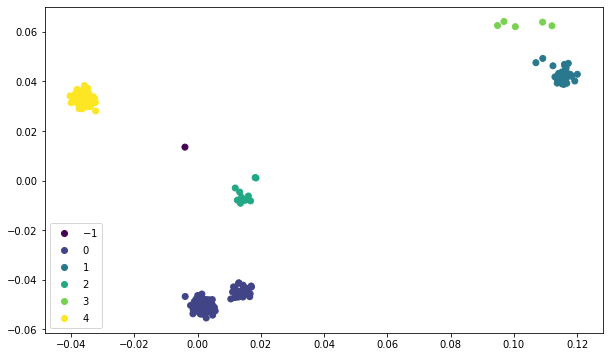

In [230]:
pylab.figure(figsize=(10, 6))
scat = pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=list(df["cluster"]))
pylab.legend(*scat.legend_elements(num="auto"))

In [231]:
orig_log_df["cluster"] = clusters
list(orig_log_df.loc[orig_log_df["cluster"] == 4]["message"])

['<190>date=2021-11-29 time=21:56:50 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638212212000307410 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 3 old report files"',
 '<190>date=2021-11-29 time=21:51:49 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638211911997278032 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 3 old report files"',
 '<190>date=2021-11-29 time=21:51:04 devname="SLX-FG-VM-165" devid="FGVM010000010981" logid="0100020027" type="event" subtype="system" level="information" vd="root" eventtime=1638211865418869407 tz="+0300" logdesc="Outdated report files deleted" msg="Delete 13 old report files"',
 '<190>date=2021-11-26 time=06:11:50 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100020027" type="event" subtype="system" level="information" vd="

# Aggregation

In [174]:
aggregated = []

for cluster in np.unique(clusters):
    
    messages = []
    for i in list(df.loc[df['cluster'] == cluster].index):
        messages.append(df_logs[1][i]["message"])

    result_string = messages[0]
    msg_num = len(messages)
        
    aggregated.append([result_string, msg_num])        

In [175]:
for x in aggregated:
    print(x, "\n")

['<13>Dec  3 03:15:23 U22020000000877 vectra_standard -: HOST [host@41261 category="HOST SCORING" hostName="Samsung-Galaxy-S7" currentIP="172.17.42.156" dvchost="172.17.18.39" threat="21" certainty="12" privilege="0" scoreDecreases="False" URL="https://172.17.18.39/hosts/14808" UTCTime="1638490523.952734" sourceKeyAsset="False" destKeyAsset="False" hostRoles=""]', 6] 

['<190>date=2021-12-03 time=02:30:02 devname="SLX-FG-VM-166" devid="FGVM010000010982" logid="0100026001" type="event" subtype="system" level="information" vd="root" eventtime=1638487803405548791 tz="+0300" logdesc="DHCP Ack log" interface="port5" dhcp_msg="Ack" mac="00:50:56:A0:35:7D" ip=172.17.42.187 lease=259200 hostname="debian10-dev" msg="DHCP server sends a DHCPACK"', 18] 

['<13>Dec  2 15:19:15 U22020000000877 vectra_standard -: DETECT [detection@41261 category="COMMAND & CONTROL" type="Hidden HTTPS Tunnel" hostname="avaskin" currentIP="172.17.17.98" dvchost="172.17.18.39" threat="50" certainty="50" URL="https://17

In [22]:
aggregated2 = []

for cluster in np.unique(clusters):
    messages = []
    for i in list(df.loc[df['cluster'] == cluster].index):
        messages.append(df_logs[1][i]["message"])

    if cluster == -1:
        aggregated2.extend(messages)
    else:
        splited_messages = [x.split() for x in messages]
        splited_transpose = [list(row) for row in zip(*splited_messages)]
        result_string = ""
        variable_params = ""
        var_num = 0

        for x in splited_transpose:
            if len(set(x)) == 1:
                result_string += x[0] + " "
            else:
                var_num += 1
                result_string += var_num*"*" + " "
                variable_params += var_num*"*" + " " + ", ".join(set(x)) + "\n"

        result_string += "\n" + variable_params

        aggregated2.append(result_string[:-1])

for x in aggregated2:
    print(x, "\n")

<13>Dec  3 03:15:23 U22020000000877 vectra_standard -: HOST [host@41261 category="HOST SCORING" hostName="Samsung-Galaxy-S7" currentIP="172.17.42.156" dvchost="172.17.18.39" threat="21" certainty="12" privilege="0" scoreDecreases="False" URL="https://172.17.18.39/hosts/14808" UTCTime="1638490523.952734" sourceKeyAsset="False" destKeyAsset="False" hostRoles=""] 

<13>Dec  1 16:11:53 U22020000000877 vectra_standard -: DETECT [detection@41261 category="INFO" type="Novel External Destination Port" hostname="fax.solidex.minsk.by" currentIP="172.17.15.3" dvchost="172.17.18.39" threat="0" certainty="0" URL="https://172.17.18.39/detections/3320?detail_id\=244128" DestinationIP="93.125.5.100" DestinationDomain="sip.telecom.by" DestinationPort="11062" Proto="udp" triaged="False" BytesSent="6182540" BytesRcvd="6193376" UTCTimeStart="2021-11-25 11:53:09" UTCTimeEnd="2021-12-01 13:11:17"] 

<13>Dec  1 15:15:23 U22020000000877 vectra_standard -: HOST [host@41261 category="HOST SCORING" hostName="mat